In [ ]:
import os
import cv2
from PIL import Image
import numpy as np

# Base directory containing the folders for each liquid type
base_dir = '/content/drive/MyDrive/UbiComp/data'

# List of liquid types
liquids = ['milk', 'mango', 'butter_scotch', 'kesar_pista', 'sauce']

#### Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### Converting videos from .h264 to .mp4

In [ ]:
# Loop through each liquid type
for liquid in liquids:
    # Path to the liquid folder
    liquid_folder = os.path.join(base_dir, liquid)

    # Loop through each video file for the liquid
    for i in range(1, 6):
        # Create the input file path
        input_file = os.path.join(liquid_folder, f"ubq_{liquid}{i}.h264")
        # Create the output file path
        output_file = os.path.join(liquid_folder, f"ubq_{liquid}{i}.mp4")

        # Construct the FFmpeg command to convert video
        command = f'ffmpeg -i "{input_file}" -c:v copy "{output_file}" -v debug'

        # Run the command
        result = os.system(command)

        # Check the result and print a message
        if result == 0:
            print(f"Conversion successful for {input_file}. Output saved as: {output_file}")
        else:
            print(f"Conversion failed for {input_file} with error code: {result}")


Conversion successful for /content/drive/MyDrive/UbiComp/data/milk/ubq_milk1.h264. Output saved as: /content/drive/MyDrive/UbiComp/data/milk/ubq_milk1.mp4
Conversion successful for /content/drive/MyDrive/UbiComp/data/milk/ubq_milk2.h264. Output saved as: /content/drive/MyDrive/UbiComp/data/milk/ubq_milk2.mp4
Conversion successful for /content/drive/MyDrive/UbiComp/data/milk/ubq_milk3.h264. Output saved as: /content/drive/MyDrive/UbiComp/data/milk/ubq_milk3.mp4
Conversion successful for /content/drive/MyDrive/UbiComp/data/milk/ubq_milk4.h264. Output saved as: /content/drive/MyDrive/UbiComp/data/milk/ubq_milk4.mp4
Conversion successful for /content/drive/MyDrive/UbiComp/data/milk/ubq_milk5.h264. Output saved as: /content/drive/MyDrive/UbiComp/data/milk/ubq_milk5.mp4
Conversion successful for /content/drive/MyDrive/UbiComp/data/mango/ubq_mango1.h264. Output saved as: /content/drive/MyDrive/UbiComp/data/mango/ubq_mango1.mp4
Conversion successful for /content/drive/MyDrive/UbiComp/data/mang

#### Frame Extraction and Blue Channel Isolation

In [ ]:
# Loop through each liquid type
for liquid in liquids:
    for i in range(1, 6):
        video_name = f'ubq_{liquid}{i}.mp4'
        video_path = os.path.join(base_dir, liquid, video_name)

        # Create a 'frames' folder if it doesn't exist
        frames_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}')
        os.makedirs(frames_folder, exist_ok=True)

        # Open the video file
        cap = cv2.VideoCapture(video_path)

        frame_count = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Extract the blue channel
            blue_channel = frame[:, :, 0]

            # Create a new image with only the blue channel containing data
            blue_image = np.zeros_like(frame)
            blue_image[:, :, 0] = blue_channel  # Only populate the blue channel

            # Save the frame as an image file
            frame_filename = os.path.join(frames_folder, f'frame_{frame_count:04d}.png')
            cv2.imwrite(frame_filename, blue_image)

            frame_count += 1

        # Release the video capture object
        cap.release()

        print(f"Processed {video_name}: {frame_count} blue channel frames extracted")

print("All videos processed successfully!")


Processed ubq_milk1.mp4: 891 blue channel frames extracted
Processed ubq_milk2.mp4: 894 blue channel frames extracted
Processed ubq_milk3.mp4: 892 blue channel frames extracted
Processed ubq_milk4.mp4: 893 blue channel frames extracted
Processed ubq_milk5.mp4: 893 blue channel frames extracted
Processed ubq_mango1.mp4: 895 blue channel frames extracted
Processed ubq_mango2.mp4: 894 blue channel frames extracted
Processed ubq_mango3.mp4: 894 blue channel frames extracted
Processed ubq_mango4.mp4: 894 blue channel frames extracted
Processed ubq_mango5.mp4: 893 blue channel frames extracted
Processed ubq_butter_scotch1.mp4: 894 blue channel frames extracted
Processed ubq_butter_scotch2.mp4: 894 blue channel frames extracted
Processed ubq_butter_scotch3.mp4: 894 blue channel frames extracted
Processed ubq_butter_scotch4.mp4: 894 blue channel frames extracted
Processed ubq_butter_scotch5.mp4: 894 blue channel frames extracted
Processed ubq_kesar_pista1.mp4: 898 blue channel frames extracted

#### Image Cropping

In [ ]:
def getLiquidConfig():
    # Cropping coordinates for each liquid and video (We want just a square containing the LiDAR dot over the liquid)
    config = {
        'butter_scotch': {
            '1': ((868, 626), (1036, 786)),
            '2': ((774, 626), (970, 812)),
            '3': ((880, 610), (1036, 788)),
            '4': ((890, 618), (1056, 796)),
            '5': ((1018, 419), (1168, 584))
        },
        'kesar_pista': {
            '1': ((967, 458), (1151, 624)),
            '2': ((983, 464), (1148, 625)),
            '3': ((790, 666), (945, 826)),
            '4': ((1150, 657), (1304, 809)),
            '5': ((930, 638), (1090, 795))
        },
        'milk': {
            '1': ((1624, 154), (1772, 309)),
            '2': ((1638, 158), (1767, 300)),
            '3': ((1629, 120), (1768, 280)),
            '4': ((990, 471), (1128, 620)),
            '5': ((1004, 443), (1135, 578))
        },
        'mango': {
            '1': ((1054, 659), (1163, 763)),
            '2': ((1062, 647), (1196, 768)),
            '3': ((843, 638), (979, 768)),
            '4': ((860, 636), (993, 770)),
            '5': ((1340, 658), (1459, 790))
        },
        'sauce': {
            '1': ((476, 435), (648, 590)),
            '2': ((447, 281), (627, 449)),
            '3': ((886, 155), (1045, 312)),
            '4': ((488, 473), (644, 638)),
            '5': ((456, 294), (606, 453))
        }
    }
    return config


# Get the configuration for cropping
config = getLiquidConfig()

# Loop through each liquid type
for liquid in liquids:
    for i in range(1, 6):
        print(f"Cropping frames for {liquid} video {i}")
        frames_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}')
        cropped_frames_folder = os.path.join(frames_folder, 'cropped')
        os.makedirs(cropped_frames_folder, exist_ok=True)

        # Loop through all PNG files in the frames folder
        for filename in os.listdir(frames_folder):
            if filename.lower().endswith('.png'):
                img_path = os.path.join(frames_folder, filename)
                img = cv2.imread(img_path)

                if img is None:
                    print(f"Error: Image {img_path} could not be read.")
                    continue

                # Get cropping coordinates for this specific video
                x1, y1 = config[liquid][str(i)][0]
                x2, y2 = config[liquid][str(i)][1]

                # Ensure coordinates are within image bounds
                height, width, _ = img.shape
                if x2 > width or y2 > height:
                    print(f"Skipping {filename}: Crop coordinates out of bounds.")
                    continue

                # Crop the image
                cropped_img = img[y1:y2, x1:x2]

                # Save the cropped image
                frame_filename = os.path.join(cropped_frames_folder, f'cropped_{filename}')
                cv2.imwrite(frame_filename, cropped_img)

print("Cropping complete for all frames.")

Cropping frames for milk video 1
Cropping frames for milk video 2
Cropping frames for milk video 3
Cropping frames for milk video 4
Cropping frames for milk video 5
Cropping frames for mango video 1
Cropping frames for mango video 2
Cropping frames for mango video 3
Cropping frames for mango video 4
Cropping frames for mango video 5
Cropping frames for butter_scotch video 1
Cropping frames for butter_scotch video 2
Cropping frames for butter_scotch video 3
Cropping frames for butter_scotch video 4
Cropping frames for butter_scotch video 5
Cropping frames for kesar_pista video 1
Cropping frames for kesar_pista video 2
Cropping frames for kesar_pista video 3
Cropping frames for kesar_pista video 4
Cropping frames for kesar_pista video 5
Cropping frames for sauce video 1
Cropping frames for sauce video 2
Cropping frames for sauce video 3
Cropping frames for sauce video 4
Cropping frames for sauce video 5
Cropping complete for all frames.


#### Filtering Frames with Visible LiDAR Dot

In [ ]:
def filter_images_with_lidar_dot(input_folder, output_folder, threshold=64):
    os.makedirs(output_folder, exist_ok=True)
    image_filenames = [f for f in os.listdir(input_folder) if f.endswith('.png')]

    def has_lidar_dot(image, threshold):
        image_array = np.array(image)
        grayscale = np.mean(image_array, axis=2)
        return np.any(grayscale > threshold)

    for filename in image_filenames:
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)
        if has_lidar_dot(image, threshold):
            image.save(os.path.join(output_folder, filename))

# Process each liquid type
for liquid in liquids:
    for i in range(1, 6):
        print(f"Filtering frames for {liquid} video {i}")
        if(liquid=='milk' and i==1):
          input_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}', 'cropped')
          output_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}', 'filtered')
          filter_images_with_lidar_dot(input_folder, output_folder, 80)
        input_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}', 'cropped')
        output_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}', 'filtered')
        filter_images_with_lidar_dot(input_folder, output_folder)

# Optionally, list the files in each output folder to verify
for liquid in liquids:
    for i in range(1, 6):
      if liquid=='milk' and i==1:
        output_folder = os.path.join(base_dir, liquid, f'blue_frames_{i}', 'filtered')
        filtered_images = os.listdir(output_folder)
        print(f"Filtered images in {liquid} set {i}: {len(filtered_images)}")


Filtering frames for milk video 1
Filtering frames for milk video 2
Filtering frames for milk video 3
Filtering frames for milk video 4
Filtering frames for milk video 5
Filtering frames for mango video 1
Filtering frames for mango video 2
Filtering frames for mango video 3
Filtering frames for mango video 4
Filtering frames for mango video 5
Filtering frames for butter_scotch video 1
Filtering frames for butter_scotch video 2
Filtering frames for butter_scotch video 3
Filtering frames for butter_scotch video 4
Filtering frames for butter_scotch video 5
Filtering frames for kesar_pista video 1
Filtering frames for kesar_pista video 2
Filtering frames for kesar_pista video 3
Filtering frames for kesar_pista video 4
Filtering frames for kesar_pista video 5
Filtering frames for sauce video 1
Filtering frames for sauce video 2
Filtering frames for sauce video 3
Filtering frames for sauce video 4
Filtering frames for sauce video 5
Filtered images in milk set 1: 119


#### Inter-Frame Correlation Computation

In [ ]:
import glob
from tqdm import tqdm

def Corr(I, I_tau):
    up = np.multiply(I - I.mean(), I_tau - I_tau.mean()).sum()
    down = np.sqrt(np.square(I - I.mean()).sum() * np.square(I_tau - I_tau.mean()).sum())
    return up / down

def compute_corr(liquids, base_path):
    data = []
    for liquid in tqdm(liquids):
        print(liquid)
        liquid_data = []
        for i in range(1, 6):  # Assuming there are 5 videos per liquid
            frame_wise_corr = []
            frame_paths = glob.glob(os.path.join(base_path, liquid, f'blue_frames_{i}', 'filtered', '*.png'))
            flag = 0
            for f in frame_paths:
                pic = cv2.imread(f, cv2.IMREAD_UNCHANGED)
                I_tau = pic[:, :, 0]  # Assuming the images are grayscale (blue channel only)
                if flag == 0:
                    flag = 1
                    I = I_tau.copy()
                else:
                    diff_image = cv2.absdiff(I, I_tau)
                    diff_folder = os.path.join(base_path, liquid, f'blue_frames_{i}', 'difference')
                    os.makedirs(diff_folder, exist_ok=True)
                    diff_filename = os.path.join(diff_folder, os.path.basename(f))
                    cv2.imwrite(diff_filename, diff_image)

                corr_I_I_tau = Corr(I, I_tau)
                I = I_tau.copy()
                frame_wise_corr.append(corr_I_I_tau)
            liquid_data.append((i, frame_wise_corr))
        data.append((liquid, liquid_data))
    return data

data = compute_corr(liquids, base_dir)


  0%|          | 0/5 [00:00<?, ?it/s]

milk


 20%|██        | 1/5 [02:34<10:17, 154.37s/it]

mango


 40%|████      | 2/5 [05:03<07:34, 151.45s/it]

butter_scotch


 60%|██████    | 3/5 [07:44<05:11, 155.86s/it]

kesar_pista


 80%|████████  | 4/5 [10:37<02:42, 162.28s/it]

sauce


100%|██████████| 5/5 [13:04<00:00, 156.99s/it]


In [ ]:
import json

# Assuming 'data' is the list returned by compute_corr
data_json = json.dumps(data)
with open('/content/drive/MyDrive/UbiComp/data/correlation_data.json', 'w') as file:
    file.write(data_json)


In [ ]:
data

[('milk',
  [(1,
    [1.0,
     0.9807413348888943,
     0.9786399061005031,
     0.9813212853550708,
     0.9805339902300952,
     0.9829774404453028,
     0.9805665537360929,
     0.9770314576129245,
     0.979543972763968,
     0.9752208343234247,
     0.97715321352063,
     0.9776244092549214,
     0.9820420995416437,
     0.9826273398724357,
     0.9831430104583783,
     0.9846909557956687,
     0.9824858987482474,
     0.9828688627153255,
     0.9807673495855277,
     0.9769613275599643,
     0.9798570208504422,
     0.9777090091110295,
     0.979471562302516,
     0.9840870434118687,
     0.98490326904527,
     0.9867659936358196,
     0.983041376816667,
     0.9828901050097014,
     0.9831562885218246,
     0.9801659468708181,
     0.9780611765497483,
     0.9803614949151506,
     0.9838205622186057,
     0.9829783548899854,
     0.9819789220887182,
     0.9834049091660099,
     0.9858431023689149,
     0.9867602743948922,
     0.9817753691116131,
     0.9797629344888694,
     

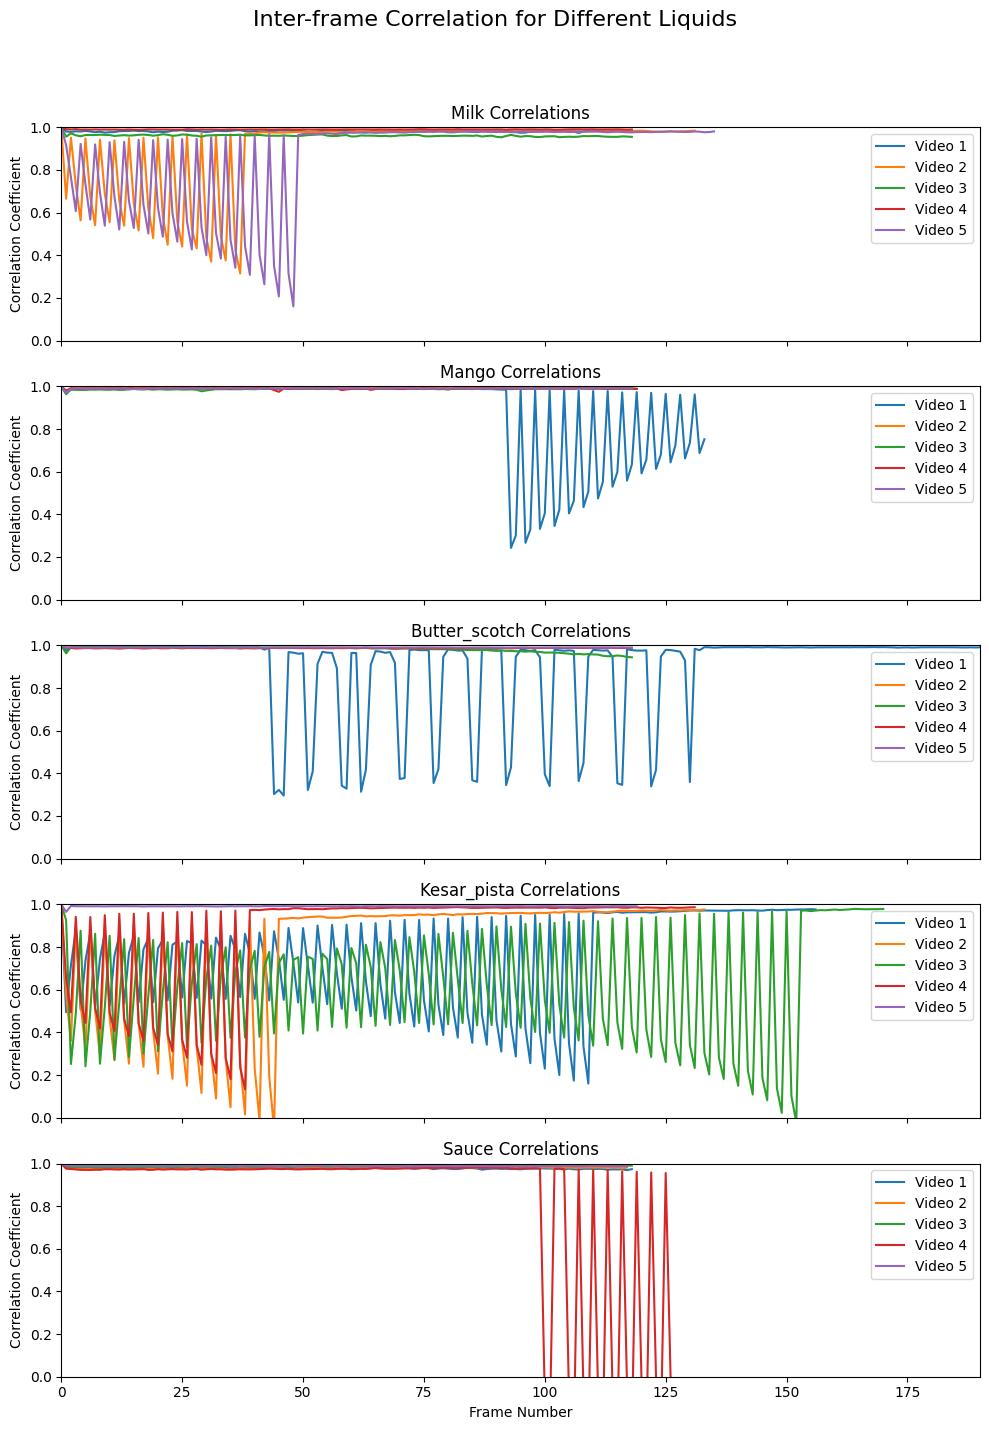

In [ ]:
import matplotlib.pyplot as plt

# Assuming data is structured as [(liquid_name, [(video_set_number, frame_wise_correlation_data), ...]), ...]
# liquids = ['milk', 'mango_juice', 'butter_scoth_ice_cream', 'kesar_pista_ice_cream', 'sauce']

# Setup plot details
fig, axs = plt.subplots(len(liquids), 1, figsize=(10, 15), sharex=True)
fig.suptitle('Inter-frame Correlation for Different Liquids', fontsize=16)

for idx, (liquid, video_correlations) in enumerate(data):
    ax = axs[idx]
    for video_number, correlations in video_correlations:
        ax.plot(correlations, label=f'Video {video_number}')

    ax.set_ylim(0, 1)  # Setting y-axis limits if correlation values are close to 1
    ax.set_xlim(0, 190)   # Assuming you are interested in the first 10 frames or adjust as necessary
    ax.legend()
    ax.set_title(f'{liquid.capitalize()} Correlations')
    ax.set_ylabel('Correlation Coefficient')

# Set common X label
axs[-1].set_xlabel('Frame Number')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


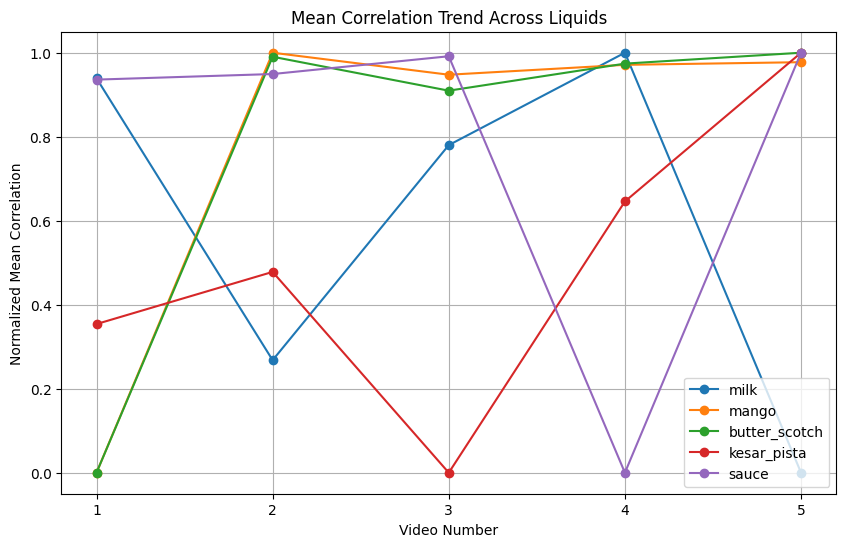

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is structured as [(liquid_name, [(video_set_number, frame_wise_correlation_data), ...]), ...]
# Extract correlation data for each liquid
correlations = {liquid: [np.mean(video_data) for _, video_data in videos] for liquid, videos in data}

# Function to normalize data using min-max normalization
def normalize(data):
    data = np.array(data)
    return (data - data.min()) / (data.max() - data.min())

# Normalize the correlation data for each liquid
normalized_correlations = {liquid: normalize(values) for liquid, values in correlations.items()}

# Plot the results
plt.figure(figsize=(10, 6))
for liquid, norms in normalized_correlations.items():
    plt.plot(range(1, 6), norms, marker='o', label=liquid)  # Assuming there are 5 videos per liquid

plt.xlabel('Video Number')
plt.ylabel('Normalized Mean Correlation')
plt.title('Mean Correlation Trend Across Liquids')
plt.xticks(range(1, 6))  # Adjust x-ticks to match the range of videos
plt.grid(True)
plt.legend()
plt.show()


####  Statistical Analysis and Feature Engineering

In [ ]:
import pandas as pd
import json

# Load JSON data
with open('/content/drive/MyDrive/UbiComp/data/correlation_data.json', 'r') as file:
    data = json.load(file)

# Assuming the JSON structure is a list of lists, or similar nested list structure
records = []
for liquid_data in data:
    liquid = liquid_data[0]  # Assuming the first element of each sub-list is the liquid name
    video_data_list = liquid_data[1]  # Assuming the second element is another list of video data
    print(video_data_list)

    if liquid != 'butter_scotch':
      for video_data in video_data_list:
          video_number = video_data[0]  # Assuming the first element here is the video number
          correlations = video_data[1]  # Assuming the second element is the list of correlations

          if liquid=='sauce':
            if video_number == 2:
              for frame_index, corr_value in enumerate(correlations):
                  records.append({
                      'liquid': liquid,
                      'video_number': video_number,
                      'frame_index': frame_index,
                      'correlation': corr_value
                  })

          elif liquid=='milk':
            if video_number == 3:
              for frame_index, corr_value in enumerate(correlations):
                  records.append({
                       'liquid': liquid,
                       'video_number': video_number,
                       'frame_index': frame_index,
                       'correlation': corr_value
                  })
          elif liquid=='mango':
            if video_number == 4:
              for frame_index, corr_value in enumerate(correlations):
                  records.append({
                       'liquid': liquid,
                       'video_number': video_number,
                       'frame_index': frame_index,
                       'correlation': corr_value
                  })
          elif liquid=='kesar_pista':
            if video_number == 5:
              for frame_index, corr_value in enumerate(correlations):
                  records.append({
                       'liquid': liquid,
                       'video_number': video_number,
                       'frame_index': frame_index,
                       'correlation': corr_value
                  })

df = pd.DataFrame(records)
print(df)




[[1, [1.0, 0.9807413348888943, 0.9786399061005031, 0.9813212853550708, 0.9805339902300952, 0.9829774404453028, 0.9805665537360929, 0.9770314576129245, 0.979543972763968, 0.9752208343234247, 0.97715321352063, 0.9776244092549214, 0.9820420995416437, 0.9826273398724357, 0.9831430104583783, 0.9846909557956687, 0.9824858987482474, 0.9828688627153255, 0.9807673495855277, 0.9769613275599643, 0.9798570208504422, 0.9777090091110295, 0.979471562302516, 0.9840870434118687, 0.98490326904527, 0.9867659936358196, 0.983041376816667, 0.9828901050097014, 0.9831562885218246, 0.9801659468708181, 0.9780611765497483, 0.9803614949151506, 0.9838205622186057, 0.9829783548899854, 0.9819789220887182, 0.9834049091660099, 0.9858431023689149, 0.9867602743948922, 0.9817753691116131, 0.9797629344888694, 0.9819427270421913, 0.9805950882257009, 0.9814526524891385, 0.9828947784505894, 0.9828801540006683, 0.9856010345398348, 0.9848532847599373, 0.9849737900864678, 0.9823633134963093, 0.9830937517670707, 0.98219838144850

In [ ]:
# Ensure that the data is shuffled to randomize the order
df = df.sample(frac=1).reset_index(drop=True)

### Model Selection and Training

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare features and labels
X = df[['correlation']]  # Features are the correlation values
y = df['liquid']         # Labels are 'milk' or 'sauce'
print(y)
# Split the data into training (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the temp data into validation and test sets (50% each of temp data, resulting in 20% of total each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Initialize and train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions_val = model.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, predictions_val))
print("Validation Accuracy:", accuracy_score(y_val, predictions_val))


0      kesar_pista
1      kesar_pista
2             milk
3            mango
4            mango
          ...     
472          mango
473          mango
474    kesar_pista
475          sauce
476    kesar_pista
Name: liquid, Length: 477, dtype: object
Validation Results:
              precision    recall  f1-score   support

 kesar_pista       0.83      0.80      0.82        25
       mango       0.68      0.83      0.75        23
        milk       1.00      1.00      1.00        11
       sauce       0.89      0.62      0.73        13

    accuracy                           0.81        72
   macro avg       0.85      0.81      0.82        72
weighted avg       0.82      0.81      0.81        72

Validation Accuracy: 0.8055555555555556


Test Results:
              precision    recall  f1-score   support

 kesar_pista       0.87      0.93      0.90        14
       mango       0.96      0.96      0.96        25
        milk       1.00      0.95      0.98        21
       sauce       1.00      1.00      1.00        12

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72

Test Accuracy: 0.9583333333333334


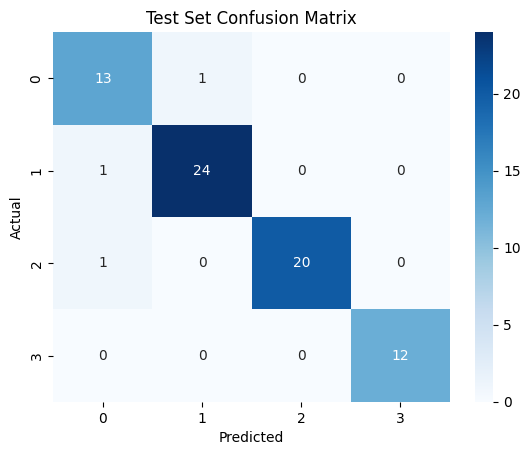

In [ ]:
# Predict on the test set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions_test = model.predict(X_test)

# Print classification report and accuracy for the test set
print("Test Results:")
print(classification_report(y_test, predictions_test))
print("Test Accuracy:", accuracy_score(y_test, predictions_test))

# Confusion matrix for the test set
conf_mat_test = confusion_matrix(y_test, predictions_test)
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Set Confusion Matrix')
plt.show()

### Butter Scotch VS Kesar Pista

In [ ]:
import pandas as pd
import json

# Load JSON data
with open('/content/drive/MyDrive/UbiComp/data/correlation_data.json', 'r') as file:
    data = json.load(file)

# Assuming the JSON structure is a list of lists, or similar nested list structure
records = []
for liquid_data in data:
    liquid = liquid_data[0]  # Assuming the first element of each sub-list is the liquid name
    video_data_list = liquid_data[1]  # Assuming the second element is another list of video data
    print(video_data_list)

    if True:
      for video_data in video_data_list:
          video_number = video_data[0]  # Assuming the first element here is the video number
          correlations = video_data[1]  # Assuming the second element is the list of correlations

          if liquid=='kesar_pista':
            if video_number == 5:
              for frame_index, corr_value in enumerate(correlations):
                  records.append({
                       'liquid': liquid,
                       'video_number': video_number,
                       'frame_index': frame_index,
                       'correlation': corr_value
                  })
          elif liquid=='butter_scotch':
            if video_number == 5:
              for frame_index, corr_value in enumerate(correlations):
                  records.append({
                       'liquid': liquid,
                       'video_number': video_number,
                       'frame_index': frame_index,
                       'correlation': corr_value
                  })

df = pd.DataFrame(records)
# Ensure that the data is shuffled to randomize the order
df = df.sample(frac=1).reset_index(drop=True)
print(df)




[[1, [1.0, 0.9807413348888943, 0.9786399061005031, 0.9813212853550708, 0.9805339902300952, 0.9829774404453028, 0.9805665537360929, 0.9770314576129245, 0.979543972763968, 0.9752208343234247, 0.97715321352063, 0.9776244092549214, 0.9820420995416437, 0.9826273398724357, 0.9831430104583783, 0.9846909557956687, 0.9824858987482474, 0.9828688627153255, 0.9807673495855277, 0.9769613275599643, 0.9798570208504422, 0.9777090091110295, 0.979471562302516, 0.9840870434118687, 0.98490326904527, 0.9867659936358196, 0.983041376816667, 0.9828901050097014, 0.9831562885218246, 0.9801659468708181, 0.9780611765497483, 0.9803614949151506, 0.9838205622186057, 0.9829783548899854, 0.9819789220887182, 0.9834049091660099, 0.9858431023689149, 0.9867602743948922, 0.9817753691116131, 0.9797629344888694, 0.9819427270421913, 0.9805950882257009, 0.9814526524891385, 0.9828947784505894, 0.9828801540006683, 0.9856010345398348, 0.9848532847599373, 0.9849737900864678, 0.9823633134963093, 0.9830937517670707, 0.98219838144850

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare features and labels
X = df[['correlation']]  # Features are the correlation values
y = df['liquid']         # Labels are 'milk' or 'sauce'
print(y)
# Split the data into training (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the temp data into validation and test sets (50% each of temp data, resulting in 20% of total each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Initialize and train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions_val = model.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, predictions_val))
print("Validation Accuracy:", accuracy_score(y_val, predictions_val))


0        kesar_pista
1        kesar_pista
2        kesar_pista
3        kesar_pista
4        kesar_pista
           ...      
234    butter_scotch
235      kesar_pista
236      kesar_pista
237    butter_scotch
238      kesar_pista
Name: liquid, Length: 239, dtype: object
Validation Results:
               precision    recall  f1-score   support

butter_scotch       0.94      0.89      0.92        19
  kesar_pista       0.89      0.94      0.91        17

     accuracy                           0.92        36
    macro avg       0.92      0.92      0.92        36
 weighted avg       0.92      0.92      0.92        36

Validation Accuracy: 0.9166666666666666


Test Results:
               precision    recall  f1-score   support

butter_scotch       0.80      0.92      0.86        13
  kesar_pista       0.95      0.87      0.91        23

     accuracy                           0.89        36
    macro avg       0.88      0.90      0.88        36
 weighted avg       0.90      0.89      0.89        36

Test Accuracy: 0.8888888888888888


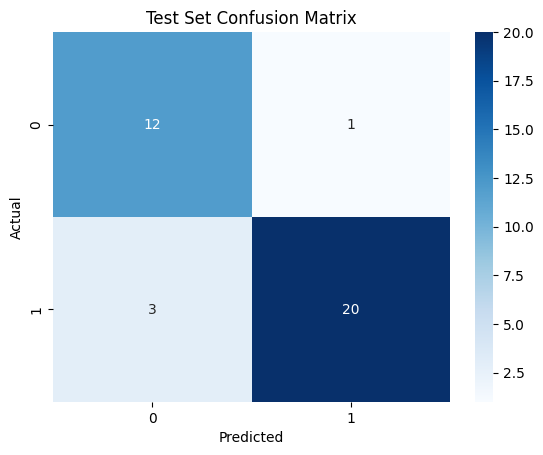

In [ ]:
# Predict on the test set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions_test = model.predict(X_test)

# Print classification report and accuracy for the test set
print("Test Results:")
print(classification_report(y_test, predictions_test))
print("Test Accuracy:", accuracy_score(y_test, predictions_test))

# Confusion matrix for the test set
conf_mat_test = confusion_matrix(y_test, predictions_test)
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Set Confusion Matrix')
plt.show()